In [10]:
import importlib
import numpy as np
import matplotlib.pyplot as plt

import Util as u
import Model2 as m2
import algorithms as alg

importlib.reload(u)
importlib.reload(m2)
importlib.reload(alg)

<module 'algorithms' from '/home/WIN-NTNU-NO/jorgennr/optimering/algorithms.py'>

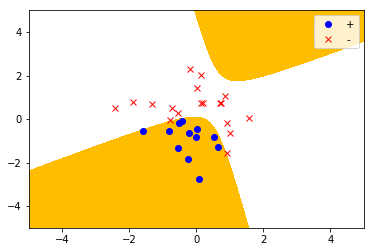

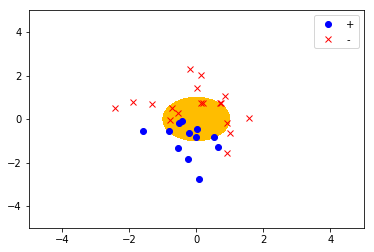

df:  0.132895037734


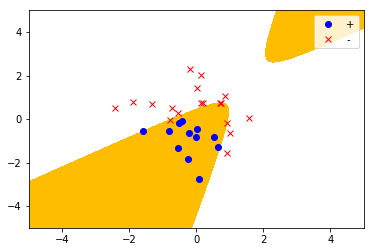

100

iter: 0
α = 1.220703125
f(x) = 56.6630723739


df:  0.0


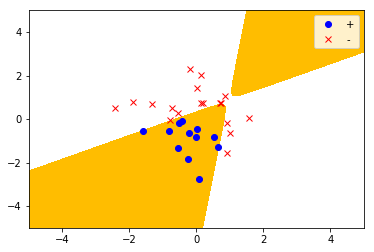

63


In [31]:
m, n = 30, 2

x, Z, W = u.generate_test_set(m, n, m2.H, x_rand = True, misclass = False)
A, b = u.from_x_to_matrix(x)
fig = plt.figure()
ax = fig.add_subplot(111)
u.visualize(ax, A, b, Z, W, m2.H)
plt.show()

x0,zzz,www = u.generate_test_set(m, n, m2.H, x_rand = False, misclass = False)
A, b = u.from_x_to_matrix(x0)
fig = plt.figure()
ax = fig.add_subplot(111)
u.visualize(ax, A, b, Z, W, m2.H)
plt.show()



x, it, f = alg.steepest_descent(m2.f, m2.df, x0, Z, W, backtrack = False, output = True)
A, b = u.from_x_to_matrix(x)

fig = plt.figure()
ax = fig.add_subplot(111)
u.visualize(ax, A, b, Z, W, m2.H)
plt.show()
print(it)


x, it, f = alg.bfgs(m2.f, m2.df, x0, Z, W, backtrack = False, output = True)
A, b = u.from_x_to_matrix(x)

fig = plt.figure()
ax = fig.add_subplot(111)
u.visualize(ax, A, b, Z, W, m2.H)
plt.show()
print(it)

In [33]:
def grad_constraints(x, eig_lo, eig_hi):
    dc1 = lambda s: np.array((1, 0, 0, 0, 0))
    dc2 = lambda s: np.array((-1, 0, 0, 0, 0))
    dc3 = lambda s: np.array((0, 0, 1, 0, 0))
    dc4 = lambda s: np.array((0, 0, -1, 0, 0))
    dc5 = lambda s: np.array(( np.sqrt( s[2]/(4*s[0]) )         , \
                               np.sqrt( s[1]**2/(eig_lo**2+s[1]**2) ) , \
                               np.sqrt( s[0]/(4*s[2]) ), 0, 0))
    return np.array( (dc1(x), dc2(x), dc3(x), dc4(x), dc5(x)) )

def constraints(x, eig_lo, eig_hi):
    c1 = lambda s: s[0] - eig_lo
    c2 = lambda s: -s[0] + eig_hi
    c3 = lambda s: s[2] - eig_lo
    c4 = lambda s: -s[2] + eig_hi
    c5 = lambda s: np.sqrt(s[0]*s[2]) - np.sqrt(eig_lo**2 + s[1]**2)
    return np.array((c1(x), c2(x), c3(x), c4(x), c5(x)))

# C is constraints
def P(x, Z, W, mu, C,  f):
    if not (C > 0).all():
        return np.inf
    
    return f(x, Z, W) - mu * np.sum(np.log(C))

def dP(x, Z, W, mu, C, dC, df):
    return df(x, Z, W) - mu * np.sum(dC.T/C, axis = 1)
    
def compute_lagrange(mu, C):
    return mu/C

def lagrange(x, Z, W, f, L, C):
    return f(x, Z, W) - np.sum(C*L)

def grad_lagrange(x, Z, W, df, L, dC):
    return df(x, Z, W) - np.sum(dC.dot(L))

def check_KKT(x, Z, W, df, L, C, dC, TOL):
    if np.linalg.norm(grad_lagrange(x, Z, W, df, L, dC)) < TOL:
        return False
    
    elif (C < 0).any():
        return False
    
    elif (L < 0).any():
        return False
    
    elif (L * C > TOL).any():
        return False
    return True

def barrier(x0, Z, W, f, df, eigs, mu0, TOL):
    it = 1
    mu = 2 * mu0
    x = x0
    C = constraints(x0, *eigs)
    dC = grad_constraints(x0, *eigs)
    p = lambda x, Z, W: P(x, Z, W, mu, C, f)
    dp = lambda x, Z, W: dP(x, Z, W, mu, C, dC, df)
    
    while it < 99:
        print("Iter:", it)
        print(C)
        print(dC)
        print(f(x0, Z, W))

        x, it, fk = alg.bfgs(p, dp, x, Z, W, TOL = 1/it**2, backtrack = False, output = True)
        print("bfgs_done")
        C = constraints(x, *eigs)
        dC = grad_constraints(x, *eigs)
        p = lambda x, Z, W: P(x, Z, W, mu, C, f)
        dp = lambda x, Z, W: dP(x, Z, W, mu, C, dC, df)
        
        L = compute_lagrange(mu, C)
        
        if check_KKT(x, Z, W, df, L, C, dC, TOL):
            return x, it, fk
        mu /= 2
        
    print("Couldnt find by barrier")
    return x, it, fk

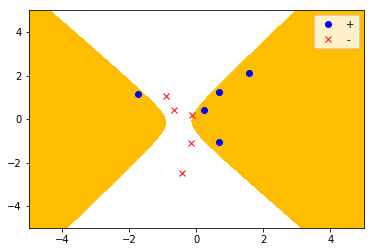

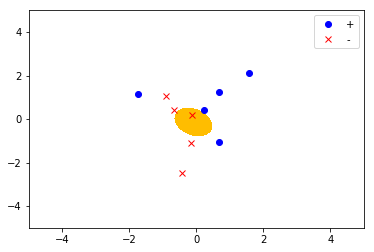

Iter: 1
[ 3.1         6.          2.1         7.          2.11873921]
[[ 1.          0.          0.          0.          0.        ]
 [-1.          0.          0.          0.          0.        ]
 [ 0.          0.          1.          0.          0.        ]
 [ 0.          0.         -1.          0.          0.        ]
 [ 0.4330127   0.74329415  0.57735027  0.          0.        ]]
1293.86871784

iter: 0
α = 9.765625
f(x) = 1292.59635178


df:  0.281508738221
bfgs_done
Iter: 8
[-20.07307654  29.17307654  -1.61043704  10.71043704  -3.28696007]
[[ 1.          0.          0.          0.          0.        ]
 [-1.          0.          0.          0.          0.        ]
 [ 0.          0.          1.          0.          0.        ]
 [ 0.          0.         -1.          0.          0.        ]
 [ 0.09624693  0.9916468   2.59748536  0.          0.        ]]
1293.86871784
Counldnt find by zoom, 5000.0, 5000.0

iter: 0
α = 5000.0
f(x) = inf


Counldnt find by zoom, 5000.0, 5000.0
Counldnt fi

KeyboardInterrupt: 

In [35]:
m, n = 10, 2
x, Z, W = u.generate_test_set(m, n, m2.H, x_rand = True, misclass = False)
A, b = u.from_x_to_matrix(x)
fig = plt.figure()
ax = fig.add_subplot(111)
u.visualize(ax, A, b, Z, W, m2.H)
plt.show()

x0 = np.array((4, 1, 3, 1, 1))
A, b = u.from_x_to_matrix(x0)
fig = plt.figure()
ax = fig.add_subplot(111)
u.visualize(ax, A, b, Z, W, m2.H)
plt.show()

x, it, f = barrier(x0, Z, W, m2.f, m2.df, (0.9, 10), 0.1, TOL = 1e-3)
A, b = u.from_x_to_matrix(x)

fig = plt.figure()
ax = fig.add_subplot(111)
u.visualize(ax, A, b, Z, W, m2.H)
plt.show()
print(it)

In [28]:
A_d, d = u.from_x_to_matrix(x0)
np.linalg.eig(A_d)

(array([ 1.,  1.]), array([[ 1.,  0.],
        [ 0.,  1.]]))